In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
wine_data = pd.read_csv('winequality-white.csv', 
                        names = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar','Chlorides', 
                                 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'PH', 'Sulphates', 'Alcohol', 
                                 'Quality'], 
                        skiprows = 1, sep = r'\s*;\s*', engine = 'python')
wine_data.head()
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed Acidity         4898 non-null   float64
 1   Volatile Acidity      4898 non-null   float64
 2   Citric Acid           4898 non-null   float64
 3   Residual Sugar        4898 non-null   float64
 4   Chlorides             4898 non-null   float64
 5   Free Sulfur Dioxide   4898 non-null   float64
 6   Total Sulfur Dioxide  4898 non-null   float64
 7   Density               4898 non-null   float64
 8   PH                    4898 non-null   float64
 9   Sulphates             4898 non-null   float64
 10  Alcohol               4898 non-null   float64
 11  Quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [3]:
corrmat = wine_data.corr()
corrmat

Fixed Acidity  Volatile Acidity  Citric Acid  \
Fixed Acidity              1.000000         -0.022697     0.289181   
Volatile Acidity          -0.022697          1.000000    -0.149472   
Citric Acid                0.289181         -0.149472     1.000000   
Residual Sugar             0.089021          0.064286     0.094212   
Chlorides                  0.023086          0.070512     0.114364   
Free Sulfur Dioxide       -0.049396         -0.097012     0.094077   
Total Sulfur Dioxide       0.091070          0.089261     0.121131   
Density                    0.265331          0.027114     0.149503   
PH                        -0.425858         -0.031915    -0.163748   
Sulphates                 -0.017143         -0.035728     0.062331   
Alcohol                   -0.120881          0.067718    -0.075729   
Quality                   -0.113663         -0.194723    -0.009209   

                      Residual Sugar  Chlorides  Free Sulfur Dioxide  \
Fixed Acidity               0.089021   0.023086            -0.049396   
Volatile Acidity            0.064286   0.070512            -0.097012   
Citric Acid                 0.094212   0.114364             0.094077   
Residual Sugar              1.000000   0.088685             0.299098   
Chlorides                   0.088685   1.000000             0.101392   
Free Sulfur Dioxide         0.299098   0.101392             1.000000   
Total Sulfur Dioxide        0.401439   0.198910             0.615501   
Density                     0.838966   0.257211             0.294210   
PH                         -0.194133  -0.090439            -0.000618   
Sulphates                  -0.026664   0.016763             0.059217   
Alcohol                    -0.450631  -0.360189            -0.250104   
Quality                    -0.097577  -0.209934             0.008158   

                      Total Sulfur Dioxide   Density        PH  Sulphates  \
Fixed Acidity                     0.091070  0.265331 -0.425858  -0.017143   
Volatile Acidity                  0.089261  0.027114 -0.031915  -0.035728   
Citric Acid                       0.121131  0.149503 -0.163748   0.062331   
Residual Sugar                    0.401439  0.838966 -0.194133  -0.026664   
Chlorides                         0.198910  0.257211 -0.090439   0.016763   
Free Sulfur Dioxide               0.615501  0.294210 -0.000618   0.059217   
Total Sulfur Dioxide              1.000000  0.529881  0.002321   0.134562   
Density                           0.529881  1.000000 -0.093591   0.074493   
PH                                0.002321 -0.093591  1.000000   0.155951   
Sulphates                         0.134562  0.074493  0.155951   1.000000   
Alcohol                          -0.448892 -0.780138  0.121432  -0.017433   
Quality                          -0.174737 -0.307123  0.099427   0.053678   

                       Alcohol   Quality  
Fixed Acidity        -0.120881 -0.113663  
Volatile Acidity      0.067718 -0.194723  
Citric Acid          -0.075729 -0.009209  
Residual Sugar       -0.450631 -0.097577  
Chlorides            -0.360189 -0.209934  
Free Sulfur Dioxide  -0.250104  0.008158  
Total Sulfur Dioxide -0.448892 -0.174737  
Density              -0.780138 -0.307123  
PH                    0.121432  0.099427  
Sulphates            -0.017433  0.053678  
Alcohol               1.000000  0.435575  
Quality               0.435575  1.000000

<Axes: >

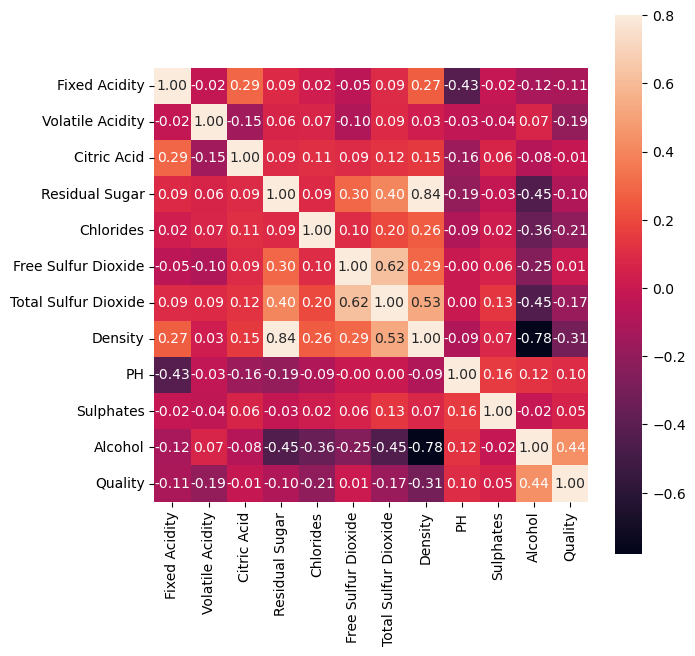

In [4]:
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, fmt='.2f')


In [5]:
x = wine_data.drop('Quality', axis=1)
y= wine_data['Quality']

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [7]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier

DecisionTreeClassifier()

In [8]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [9]:
score = classifier.score(x_test, y_test)
score

0.5724489795918367

In [10]:
y_pred = classifier.predict(x_test)
y_pred

array([6, 6, 4, 7, 6, 5, 6, 7, 5, 6, 8, 7, 5, 5, 6, 5, 5, 5, 7, 6, 5, 7,
       6, 5, 7, 8, 5, 5, 7, 6, 5, 5, 6, 7, 5, 6, 7, 7, 7, 6, 5, 5, 5, 6,
       5, 6, 6, 7, 7, 6, 7, 6, 5, 6, 6, 7, 5, 6, 6, 6, 5, 6, 7, 6, 7, 6,
       6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 7,
       6, 6, 7, 7, 6, 8, 5, 7, 7, 6, 6, 6, 6, 6, 6, 7, 7, 7, 6, 6, 5, 5,
       5, 8, 6, 6, 7, 7, 6, 5, 7, 6, 5, 6, 5, 5, 5, 7, 5, 7, 6, 6, 6, 6,
       6, 7, 5, 5, 6, 6, 5, 7, 5, 7, 5, 6, 6, 5, 7, 5, 6, 7, 7, 6, 7, 7,
       5, 6, 5, 6, 6, 7, 6, 5, 7, 7, 4, 6, 6, 6, 5, 5, 7, 7, 5, 7, 6, 7,
       5, 5, 5, 5, 6, 5, 7, 7, 6, 5, 6, 6, 5, 6, 6, 6, 6, 7, 6, 5, 6, 6,
       6, 6, 7, 5, 5, 7, 6, 6, 6, 5, 7, 5, 5, 8, 7, 6, 6, 8, 6, 6, 5, 7,
       6, 6, 6, 6, 6, 5, 6, 4, 6, 6, 5, 6, 5, 5, 5, 7, 3, 6, 6, 5, 5, 7,
       7, 5, 5, 7, 5, 7, 6, 6, 6, 5, 5, 7, 7, 5, 6, 5, 6, 7, 7, 6, 6, 6,
       5, 6, 6, 6, 5, 7, 6, 7, 5, 6, 6, 5, 7, 6, 6, 5, 7, 6, 5, 5, 7, 6,
       6, 5, 6, 5, 7, 7, 6, 7, 5, 5, 6, 5, 6, 7, 7,

In [11]:
classifier.n_features_

AttributeError: 'DecisionTreeClassifier' object has no attribute 'n_features_'

In [12]:
classifier.feature_importances_

array([0.07417277, 0.0988116 , 0.07470208, 0.07846453, 0.08449351,
       0.10445078, 0.09242618, 0.08350903, 0.08861521, 0.08756808,
       0.13278623])

In [13]:
# Graphviz can be downloaded @https://graphviz.gitlab.io/download/
import sklearn.tree as tree
tree.export_graphviz(classifier, out_file='tree_du.dot', feature_names=x.columns)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.372179 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.372179 to fit



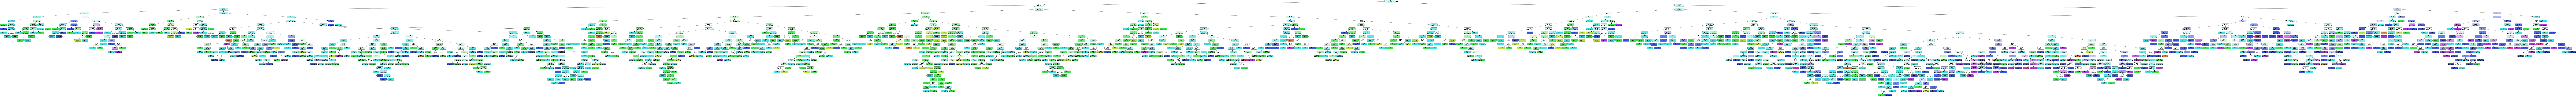

In [19]:
# Graphviz -converts decision tree classifier into dot file
# Pydotplus- convert this dot file to png
from IPython.display import Image 
import pydotplus
from sklearn.tree import export_graphviz
  
import six
import sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO
#import mlrose
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

from IPython.display import Image  
import pydotplus # Pip install pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

In [22]:
classifier_1 = DecisionTreeClassifier(criterion='entropy', max_depth=4)
classifier_1 = classifier_1.fit(x_train, y_train)

In [24]:
from sklearn import metrics
y_pred = classifier_1.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4959183673469388


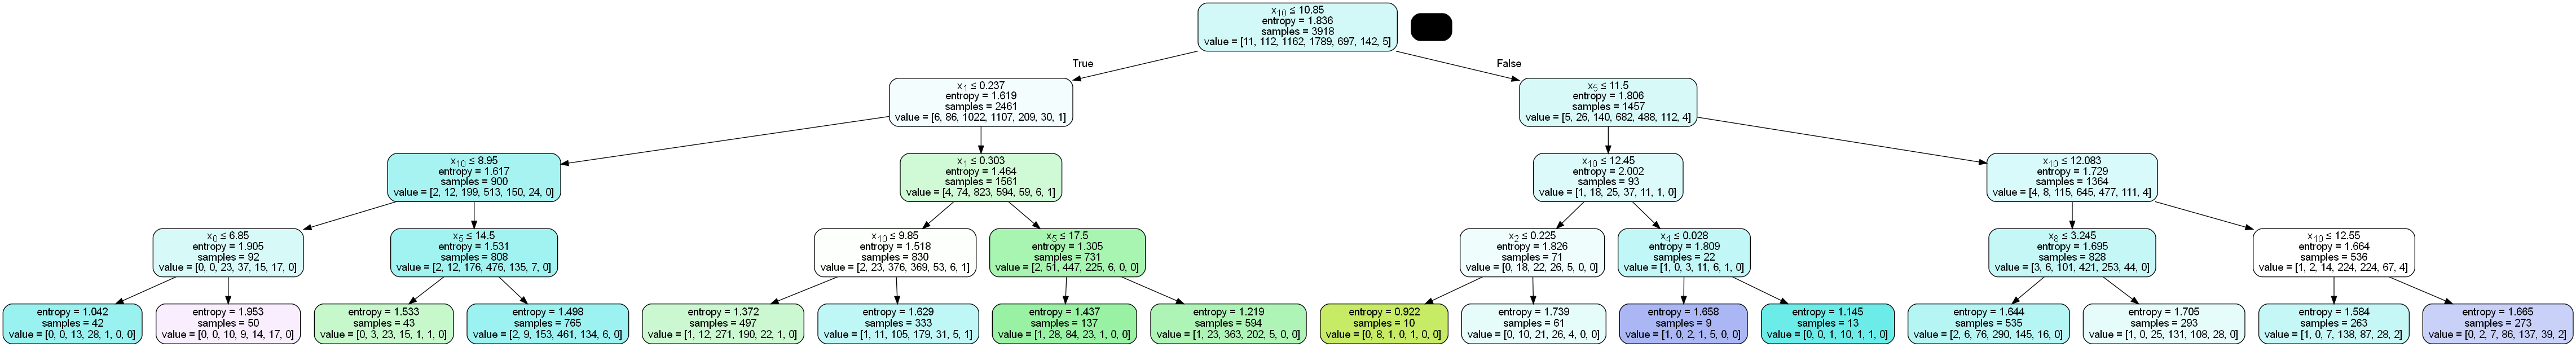

In [25]:
dot_data = StringIO()
export_graphviz(classifier_1, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())